Reading All Folders & Extract Main Features From Every Audio And Save In CSV

In [9]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path to the data
data_path = "/content/drive/MyDrive/IntroToAIData/Data/genres_original"

# Function to extract all main features from an audio file
def extract_features(file_path):
    try:
        # Read and load the audio file
        audio, sample_rate = librosa.load(file_path, duration=30)

        # Initialize feature dictionary so can store the features in it
        features = {}

        # Spectral features
        features["chroma_stft_mean"] = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate))
        features["chroma_stft_var"] = np.var(librosa.feature.chroma_stft(y=audio, sr=sample_rate))
        features["spectral_centroid_mean"] = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sample_rate))
        features["spectral_centroid_var"] = np.var(librosa.feature.spectral_centroid(y=audio, sr=sample_rate))
        features["spectral_bandwidth_mean"] = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate))
        features["spectral_bandwidth_var"] = np.var(librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate))
        features["rolloff_mean"] = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sample_rate))
        features["rolloff_var"] = np.var(librosa.feature.spectral_rolloff(y=audio, sr=sample_rate))

        # Rhythmic features
        tempo, beat_frames = librosa.beat.beat_track(y=audio, sr=sample_rate)
        features["tempo"] = tempo
        features["beats_count"] = len(beat_frames)

        # Zero crossing rate
        features["zero_crossing_rate_mean"] = np.mean(librosa.feature.zero_crossing_rate(y=audio))
        features["zero_crossing_rate_var"] = np.var(librosa.feature.zero_crossing_rate(y=audio))

        # Energy features
        features["rmse_mean"] = np.mean(librosa.feature.rms(y=audio))
        features["rmse_var"] = np.var(librosa.feature.rms(y=audio))

        # MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
        for i in range(13):
            features[f"mfcc_{i+1}_mean"] = np.mean(mfccs[i])
            features[f"mfcc_{i+1}_var"] = np.var(mfccs[i])

        # Delta and Delta Delta MFCCs
        delta_mfcc = librosa.feature.delta(mfccs)
        delta2_mfcc = librosa.feature.delta(mfccs, order=2)
        for i in range(13):
            features[f"delta_mfcc_{i+1}_mean"] = np.mean(delta_mfcc[i])
            features[f"delta_mfcc_{i+1}_var"] = np.var(delta_mfcc[i])
            features[f"delta2_mfcc_{i+1}_mean"] = np.mean(delta2_mfcc[i])
            features[f"delta2_mfcc_{i+1}_var"] = np.var(delta2_mfcc[i])

        # Mel Spectrogram features
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
        features["mel_spectrogram_mean"] = np.mean(mel_spectrogram)
        features["mel_spectrogram_var"] = np.var(mel_spectrogram)

        # Spectral contrast
        spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
        for i in range(spectral_contrast.shape[0]):
            features[f"spectral_contrast_band_{i+1}_mean"] = np.mean(spectral_contrast[i])
            features[f"spectral_contrast_band_{i+1}_var"] = np.var(spectral_contrast[i])

        # Tonnetz tonal centroid features
        tonnetz = librosa.feature.tonnetz(y=audio, sr=sample_rate)
        for i in range(tonnetz.shape[0]):
            features[f"tonnetz_dim_{i+1}_mean"] = np.mean(tonnetz[i])
            features[f"tonnetz_dim_{i+1}_var"] = np.var(tonnetz[i])

        return features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Loop in genres and extract all feature
data = []
genres = os.listdir(data_path)

for genre in genres:
    genre_path = os.path.join(data_path, genre)
    if os.path.isdir(genre_path):  # Ensure it's a directory
        print(f"Processing genre: {genre}")
        for file in os.listdir(genre_path):
            if file.endswith('.wav'):
                file_path = os.path.join(genre_path, file)
                features = extract_features(file_path)
                if features:
                    features["genre"] = genre
                    data.append(features)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save feature to a CSV file for model development and preprocessing
df.to_csv("audio_features_enhanced.csv", index=False)
print("Enhanced feature extraction complete. Saved to audio_features_enhanced.csv.")

Processing genre: country
Processing genre: classical
Processing genre: hiphop
Processing genre: reggae
Processing genre: disco
Processing genre: rock
Processing genre: pop
Processing genre: metal
Processing genre: jazz


<ipython-input-9-af33ba9150cf>:14: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /content/drive/MyDrive/IntroToAIData/Data/genres_original/jazz/jazz.00054.wav: 
Processing genre: blues
Enhanced feature extraction complete. Saved to audio_features_enhanced.csv.


Print First 7 Rows

In [10]:
# Display the DataFrame
df.head(7)

,chroma_stft_mean,chroma_stft_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,tempo,beats_count,...,tonnetz_dim_2_var,tonnetz_dim_3_mean,tonnetz_dim_3_var,tonnetz_dim_4_mean,tonnetz_dim_4_var,tonnetz_dim_5_mean,tonnetz_dim_5_var,tonnetz_dim_6_mean,tonnetz_dim_6_var,genre
0,0.420834,0.079630,2800.214423,421154.524689,2773.173156,107047.236818,6004.497025,1.988144e+06,[112.34714673913044],56,...,0.003809,-0.022921,0.020049,-0.020848,0.013158,-0.002178,0.001825,-0.006832,0.001792,country
1,0.379699,0.079592,1959.337324,356194.729671,2147.103397,102979.597176,4208.891216,1.555014e+06,[151.99908088235293],74,...,0.007075,0.063141,0.016150,0.037684,0.009747,-0.019227,0.002125,0.023143,0.002133,country
2,0.368103,0.086348,2812.414612,523075.274933,2842.082596,175334.998919,6062.846672,2.829816e+06,[129.19921875],64,...,0.005332,-0.088340,0.006807,0.018977,0.009812,0.014668,0.001072,0.002525,0.001748,country
3,0.429753,0.073833,3191.484577,178081.149509,2948.097883,68736.088275,6926.349784,8.677292e+05,[95.703125],48,...,0.002208,0.041066,0.010801,-0.017265,0.007563,0.007146,0.000897,-0.026801,0.001108,country
4,0.364768,0.088171,2951.948678,966904.831274,3036.206123,125492.899599,6568.843612,2.666858e+06,[135.99917763157896],69,...,0.003331,-0.061342,0.009930,0.012863,0.007520,-0.002488,0.000931,0.009511,0.001313,country
5,0.322577,0.088199,1425.808985,232106.872363,1648.614823,109833.420167,2880.507582,1.361242e+06,[107.666015625],51,...,0.008243,-0.091333,0.018345,-0.046532,0.033098,0.000403,0.002331,-0.002500,0.003013,country
6,0.417352,0.082777,2926.865766,277618.052801,2736.268565,73995.353642,6172.429343,1.170842e+06,[129.19921875],65,...,0.003016,0.047027,0.010396,0.002163,0.012902,0.006265,0.001140,-0.000617,0.001282,country


Print Dataset Shape

In [11]:
print("Dataset Shape")
print(df.shape)

Dataset Shape
(880, 121)


Plot the Waveform of Random File

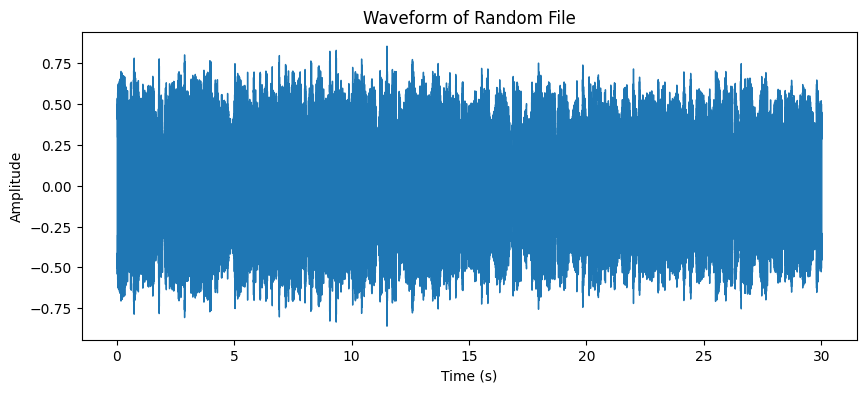

In [12]:
# Visualize the audio file
example_audio_path = os.path.join(data_path, genres[0], os.listdir(os.path.join(data_path, genres[0]))[0])
audio, sr = librosa.load(example_audio_path, duration=30)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
# Plot the main Title Waveform of file etc
plt.title("Waveform of Random File")
# Plot X Lable Time (s)
plt.xlabel("Time (s)")
# Plot Y Lable Amplitude
plt.ylabel("Amplitude")
plt.show()

Preprocessing

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Handle missing values
# First check in dataset if any missing value
print("Missing values per column:", df.isnull().sum())
print()

# SimpleImputer technique to fill missing value with the mean of the column
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop('genre', axis=1)))
df_imputed.columns = df.drop('genre', axis=1).columns

# Re attach the genre column to the imputed new features
df_imputed['genre'] = df['genre']

# Normalize the features Standardization
# StandardScaler standardize feature by removing the mean and scaling to unit variance
scaler = StandardScaler()
# Genre Feature Drop
X = df_imputed.drop('genre', axis=1)
# Target Feature genre that will predict
y = df_imputed['genre']

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Encode the genre label by using technique Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Checking the shape of the final dataset after pre processing
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Missing values per column: chroma_stft_mean           0
chroma_stft_var            0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
                          ..
tonnetz_dim_5_mean         0
tonnetz_dim_5_var          0
tonnetz_dim_6_mean         0
tonnetz_dim_6_var          0
genre                      0
Length: 121, dtype: int64

Training features shape: (616, 120)
Test features shape: (264, 120)
Training labels shape: (616,)
Test labels shape: (264,)


Machine Learning Model: Random Forst & SVM

In [14]:
# Import random forest and SVM library also for accuracy score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("RANDOM FOREST ACCURACY = " + str(rf_accuracy))

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM MODEL ACCURACY = " + str(svm_accuracy))

RANDOM FOREST ACCURACY = 0.7803030303030303
SVM MODEL ACCURACY = 0.7878787878787878


Deep Learning Model Multilayer Perceptron

In [15]:
# Import Deep learning model library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Convert label to categorical for Multilayer Perceptron
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Multilayer Perceptron Layers
mlp_model = Sequential()
# Dense 128 & Relu
mlp_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
# Dropout 0.5
mlp_model.add(Dropout(0.5))
# Dense 64 & Relu
mlp_model.add(Dense(64, activation='relu'))
# Output layer with softmax for classification
mlp_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

mlp_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train on 700 epochs
mlp_model.fit(X_train, y_train_cat, epochs=700, batch_size=32, verbose=1)
mlp_score = mlp_model.evaluate(X_test, y_test_cat, verbose=0)
# Print the Accuracy
print("MLP Accuracy = "+ str(mlp_score[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1977 - loss: 2.3189
Epoch 2/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4495 - loss: 1.5693
Epoch 3/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5071 - loss: 1.3103
Epoch 4/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5449 - loss: 1.2098
Epoch 5/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6664 - loss: 1.0154
Epoch 6/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6224 - loss: 0.9935
Epoch 7/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6954 - loss: 0.8776
Epoch 8/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7095 - loss: 0.8182
Epoch 9/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7276 - loss: 0.7571
Epoch 10/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7528 - loss: 0.6698
Epoch 11/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7822 - loss: 0.5911
Epoch 12/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

Deep Learning Model Convolutional Neural Network

In [16]:
# Import Library for CNN Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Convert my Y train & Y Test to categorical for CNN
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Reshaping Data For CNN 1D convolution Treat Like A Channel
# Reshape like the sample & features & 1
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# CNN Model
cnn_model = Sequential()

# 64 filters & kernel size 3 & ReLU activation
cnn_model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
# MaxPooling layer
cnn_model.add(MaxPooling1D(2))

# 128 filters & kernel size 3 & ReLU activation
cnn_model.add(Conv1D(128, 3, activation='relu'))
# MaxPooling layer
cnn_model.add(MaxPooling1D(2))

# Flatten the output To Feed The Dense Layer
cnn_model.add(Flatten())

# 128 Neurons In Dense Layer
cnn_model.add(Dense(128, activation='relu'))
# Dropout Layer
cnn_model.add(Dropout(0.5))

# Softmax -> classification It Means Output Layer
cnn_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train on 700 Iterations Means Epochs
cnn_model.fit(X_train_cnn, y_train_cat, epochs=700, batch_size=32, verbose=1)

cnn_score = cnn_model.evaluate(X_test_cnn, y_test_cat, verbose=0)

# CNN model accuracy
print("CNN Accuracy = " + str(cnn_score[1]))

Epoch 1/700


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1919 - loss: 2.0721
Epoch 2/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5117 - loss: 1.4206
Epoch 3/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5916 - loss: 1.1622
Epoch 4/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6720 - loss: 0.9396
Epoch 5/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7250 - loss: 0.8013
Epoch 6/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7640 - loss: 0.6926
Epoch 7/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7926 - loss: 0.6237
Epoch 8/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8338 - loss: 0.4946
Epoch 9/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8325 - loss: 0.4700
Epoch 10/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8900 - loss: 0.3737
Epoch 11/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9083 - loss: 0.3016
Epoch 12/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy:

Saving Models MLP & CNN & SVM & RANDOM FOREST

In [17]:
import joblib

# Save The MLP Model
mlp_model.save("mlp_model.keras")
print("MLP model saved.")

# Save The CNN Model
cnn_model.save("cnn_model.keras")
print("CNN model saved.")

# Save The Random Forest Model
joblib.dump(rf_model, "rf_model.pkl")
print("Random Forest model saved.")

# Save The SVM Model
joblib.dump(svm_model, "svm_model.pkl")
print("SVM model saved.")

MLP model saved.
CNN model saved.
Random Forest model saved.
SVM model saved.


LSTM Model Architecture

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

# Sequential Data Reshaping for LSTM
# Use MFCCs (or other sequential features) as the input for LSTM
X_mfcc = np.array([librosa.feature.mfcc(y=np.random.rand(661500), sr=22050, n_mfcc=13).T[:128] for _ in range(X_train.shape[0])])
X_test_mfcc = np.array([librosa.feature.mfcc(y=np.random.rand(661500), sr=22050, n_mfcc=13).T[:128] for _ in range(X_test.shape[0])])

# Ensure proper reshaping
X_mfcc = np.array([x[:128, :] for x in X_mfcc])  # Padding or truncation
X_test_mfcc = np.array([x[:128, :] for x in X_test_mfcc])

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the LSTM model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(128, 13)),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_mfcc, y_train_cat, epochs=50, batch_size=32, validation_data=(X_test_mfcc, y_test_cat))

# Evaluate the model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_mfcc, y_test_cat)
print(f"LSTM Test Loss: {lstm_loss}, LSTM Test Accuracy: {lstm_accuracy}")

# Save the LSTM model
lstm_model.save("lstm_model.keras")
print("LSTM model saved.")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 610ms/step - accuracy: 0.1088 - loss: 2.2216 - val_accuracy: 0.0758 - val_loss: 2.2178
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 462ms/step - accuracy: 0.1166 - loss: 2.1999 - val_accuracy: 0.0909 - val_loss: 2.2036
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step - accuracy: 0.1105 - loss: 2.2005 - val_accuracy: 0.0720 - val_loss: 2.2055
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step - accuracy: 0.1156 - loss: 2.1966 - val_accuracy: 0.0758 - val_loss: 2.2089
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - accuracy: 0.1452 - loss: 2.1973 - val_accuracy: 0.0758 - val_loss: 2.2142
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 425ms/step - accuracy: 0.1252 - loss: 2.2029 - val_accuracy: 0.0720 - val_loss: 2.2050
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 253ms/step - accuracy: 0.1360 - loss: 2.1948 - val_accuracy: 0.1136 - val_loss: 2.2007
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - accuracy: 0.1827 - loss: 2.1838 - val_accuracy: 

Visualizing LSTM Performance

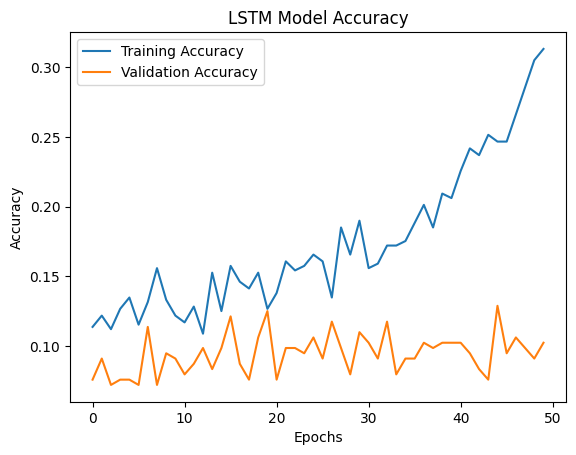

In [19]:
import matplotlib.pyplot as plt

# Plot LSTM training history
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Model Performance Comparison

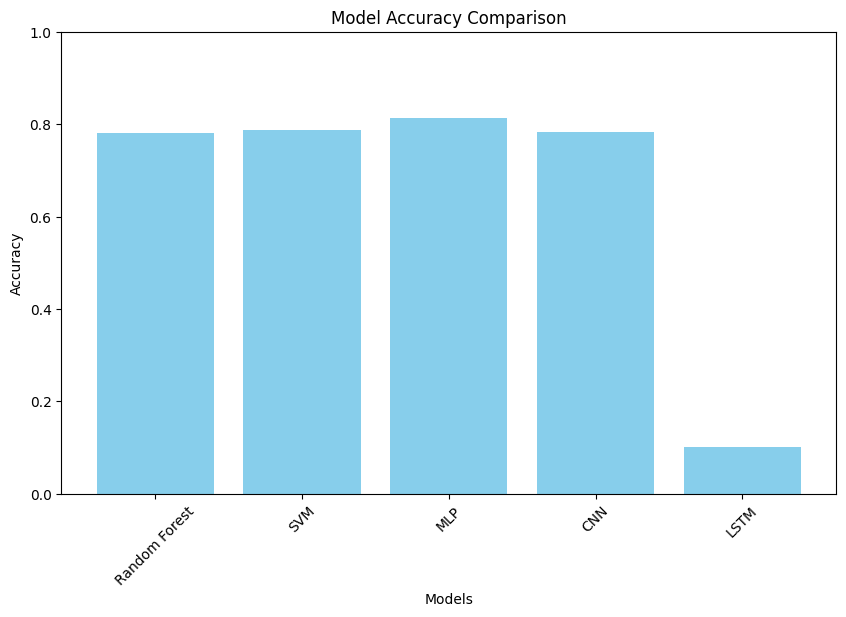

In [20]:
import matplotlib.pyplot as plt

# Model accuracies
model_names = ['Random Forest', 'SVM', 'MLP', 'CNN', 'LSTM']
model_accuracies = [rf_accuracy, svm_accuracy, mlp_score[1], cnn_score[1], lstm_accuracy]

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


Feature Importance

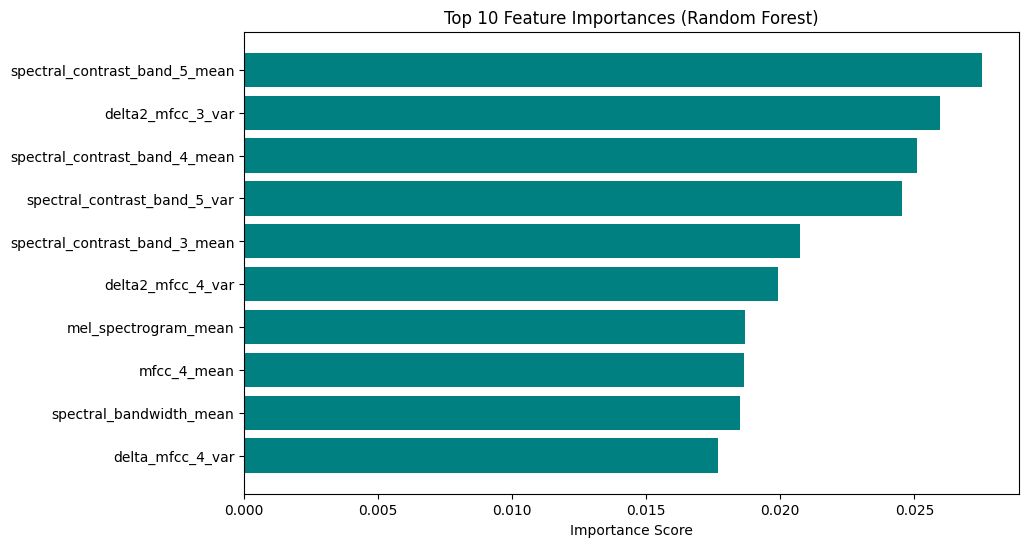

In [21]:
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_indices][:10], importances[sorted_indices][:10], color='teal')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()


Evaluation Metrics

Random Forest Classification Report:
              precision    recall  f1-score   support

       blues       0.82      0.79      0.81        34
   classical       0.95      0.90      0.92        20
     country       0.64      0.78      0.70        32
       disco       0.83      0.59      0.69        32
      hiphop       0.70      0.72      0.71        32
        jazz       0.74      0.83      0.78        24
       metal       0.85      0.94      0.89        31
         pop       0.89      0.78      0.83        32
      reggae       0.71      0.74      0.73        27

    accuracy                           0.78       264
   macro avg       0.79      0.79      0.79       264
weighted avg       0.79      0.78      0.78       264

SVM Classification Report:
              precision    recall  f1-score   support

       blues       0.74      0.94      0.83        34
   classical       0.83      1.00      0.91        20
     country       0.76      0.69      0.72        32
       disco  

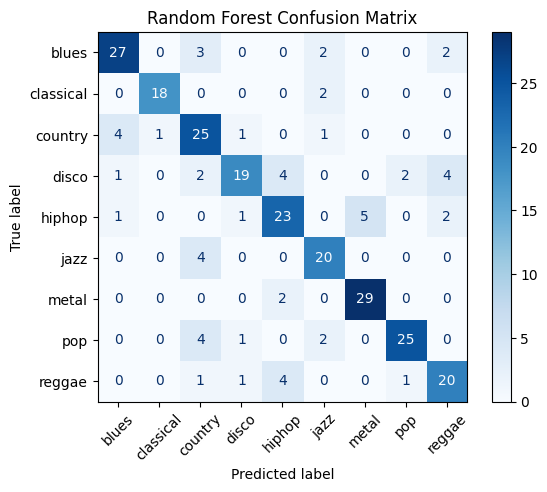

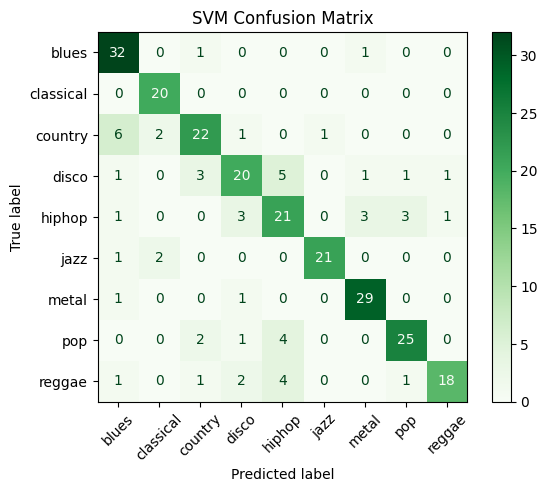

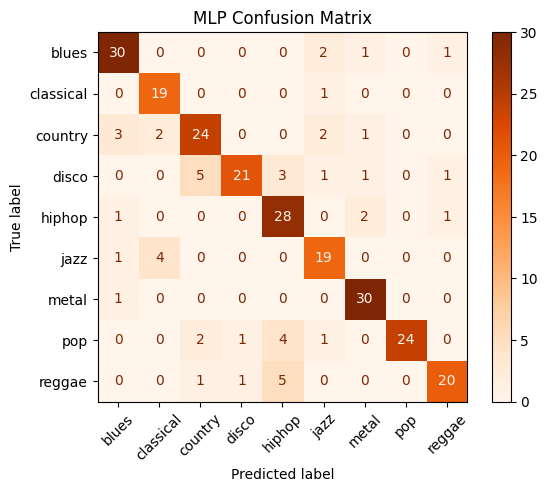

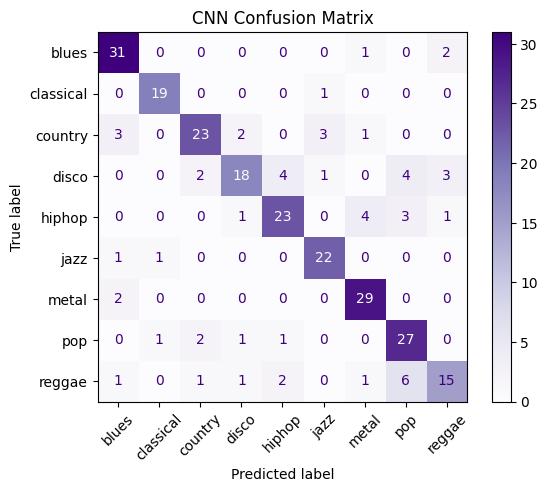

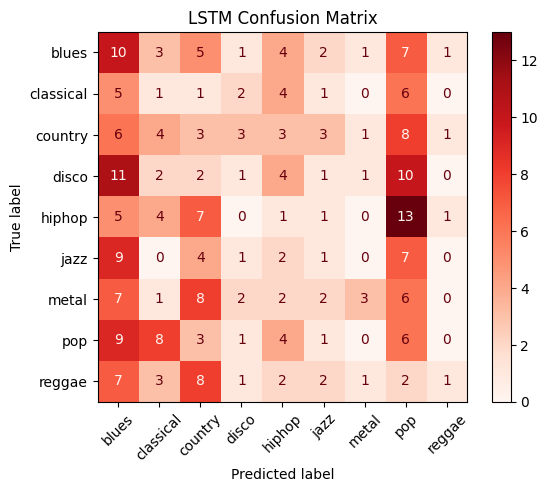

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Random Forest evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred, target_names=label_encoder.classes_))

# SVM evaluation
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred, target_names=label_encoder.classes_))

# Deep Learning models (MLP, CNN, LSTM)
y_test_cat_inverse = np.argmax(y_test_cat, axis=1)
mlp_pred = np.argmax(mlp_model.predict(X_test), axis=1)
cnn_pred = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
lstm_pred = np.argmax(lstm_model.predict(X_test_mfcc), axis=1)

print("MLP Classification Report:")
print(classification_report(y_test_cat_inverse, mlp_pred, target_names=label_encoder.classes_))

print("CNN Classification Report:")
print(classification_report(y_test_cat_inverse, cnn_pred, target_names=label_encoder.classes_))

print("LSTM Classification Report:")
print(classification_report(y_test_cat_inverse, lstm_pred, target_names=label_encoder.classes_))

# Confusion Matrix for one model (e.g., Random Forest)
cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Random Forest Confusion Matrix')
plt.show()

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, svm_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=label_encoder.classes_)
disp_svm.plot(cmap='Greens', xticks_rotation=45)
plt.title('SVM Confusion Matrix')
plt.show()

# Confusion matrix for MLP
cm_mlp = confusion_matrix(y_test_cat_inverse, mlp_pred)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=label_encoder.classes_)
disp_mlp.plot(cmap='Oranges', xticks_rotation=45)
plt.title('MLP Confusion Matrix')
plt.show()

# Confusion matrix for CNN
cm_cnn = confusion_matrix(y_test_cat_inverse, cnn_pred)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=label_encoder.classes_)
disp_cnn.plot(cmap='Purples', xticks_rotation=45)
plt.title('CNN Confusion Matrix')
plt.show()

# Confusion matrix for LSTM
cm_lstm = confusion_matrix(y_test_cat_inverse, lstm_pred)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=label_encoder.classes_)
disp_lstm.plot(cmap='Reds', xticks_rotation=45)
plt.title('LSTM Confusion Matrix')
plt.show()



Training Accuracy Curves for Models

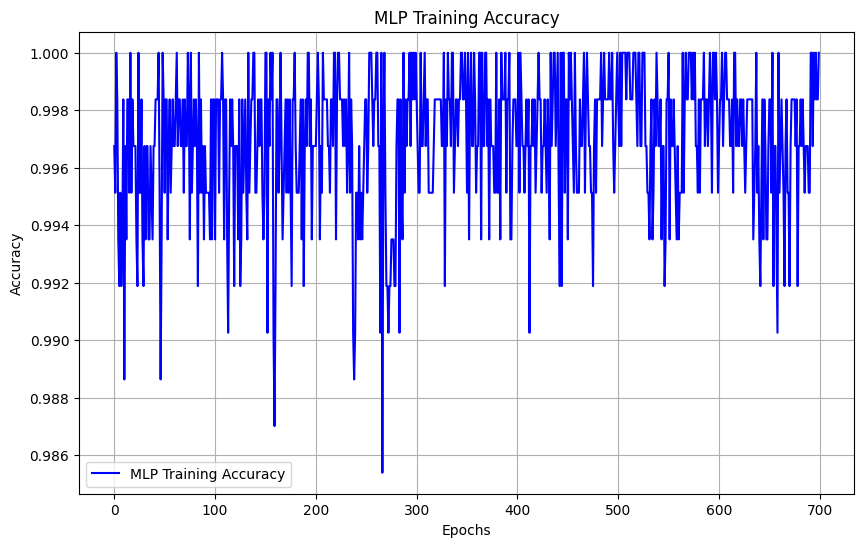

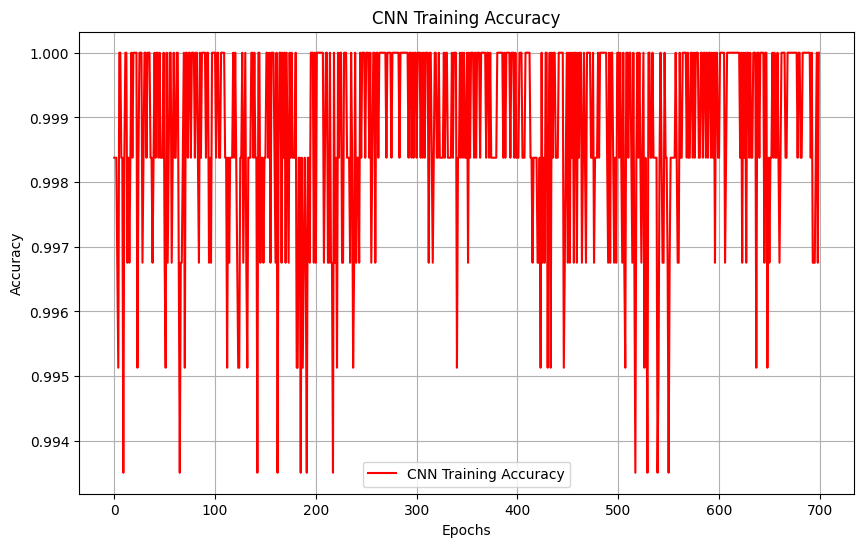

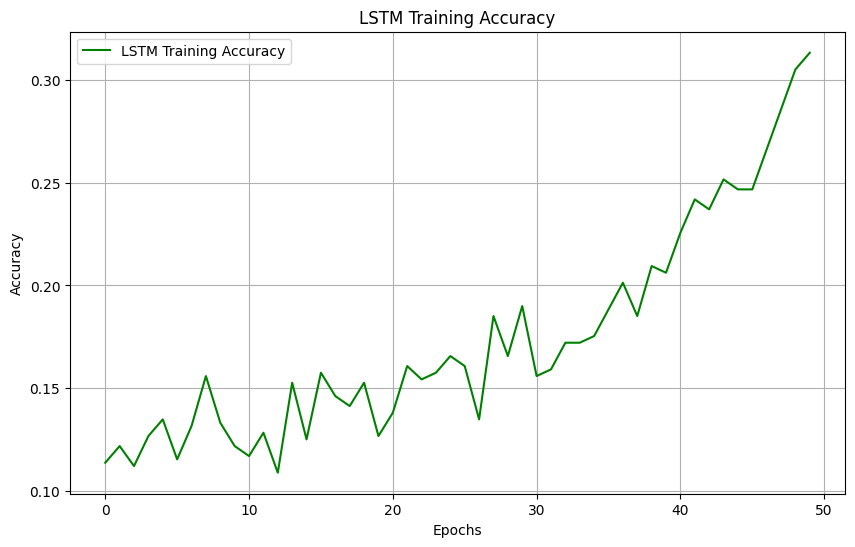

In [27]:
import matplotlib.pyplot as plt

# Plot MLP Training Accuracy
plt.figure(figsize=(10, 6))
plt.plot(mlp_history.history['accuracy'], label='MLP Training Accuracy', color='blue')
plt.title('MLP Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot CNN Training Accuracy
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy', color='red')
plt.title('CNN Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot LSTM Training Accuracy
plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy', color='green')
plt.title('LSTM Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
